# Bin Packing Lab

- Authors:
  - Adam Podolak, podola2@mcmaster.ca
  - Justin Ho, hoj66@mcmaster.ca
- Group ID on Avenue: binpack 25
- Gitlab URL: https://gitlab.cas.mcmaster.ca/podola2/l2-bin-packing

## T1: Understand The Code Base

#### Explanation of SOLID Principles

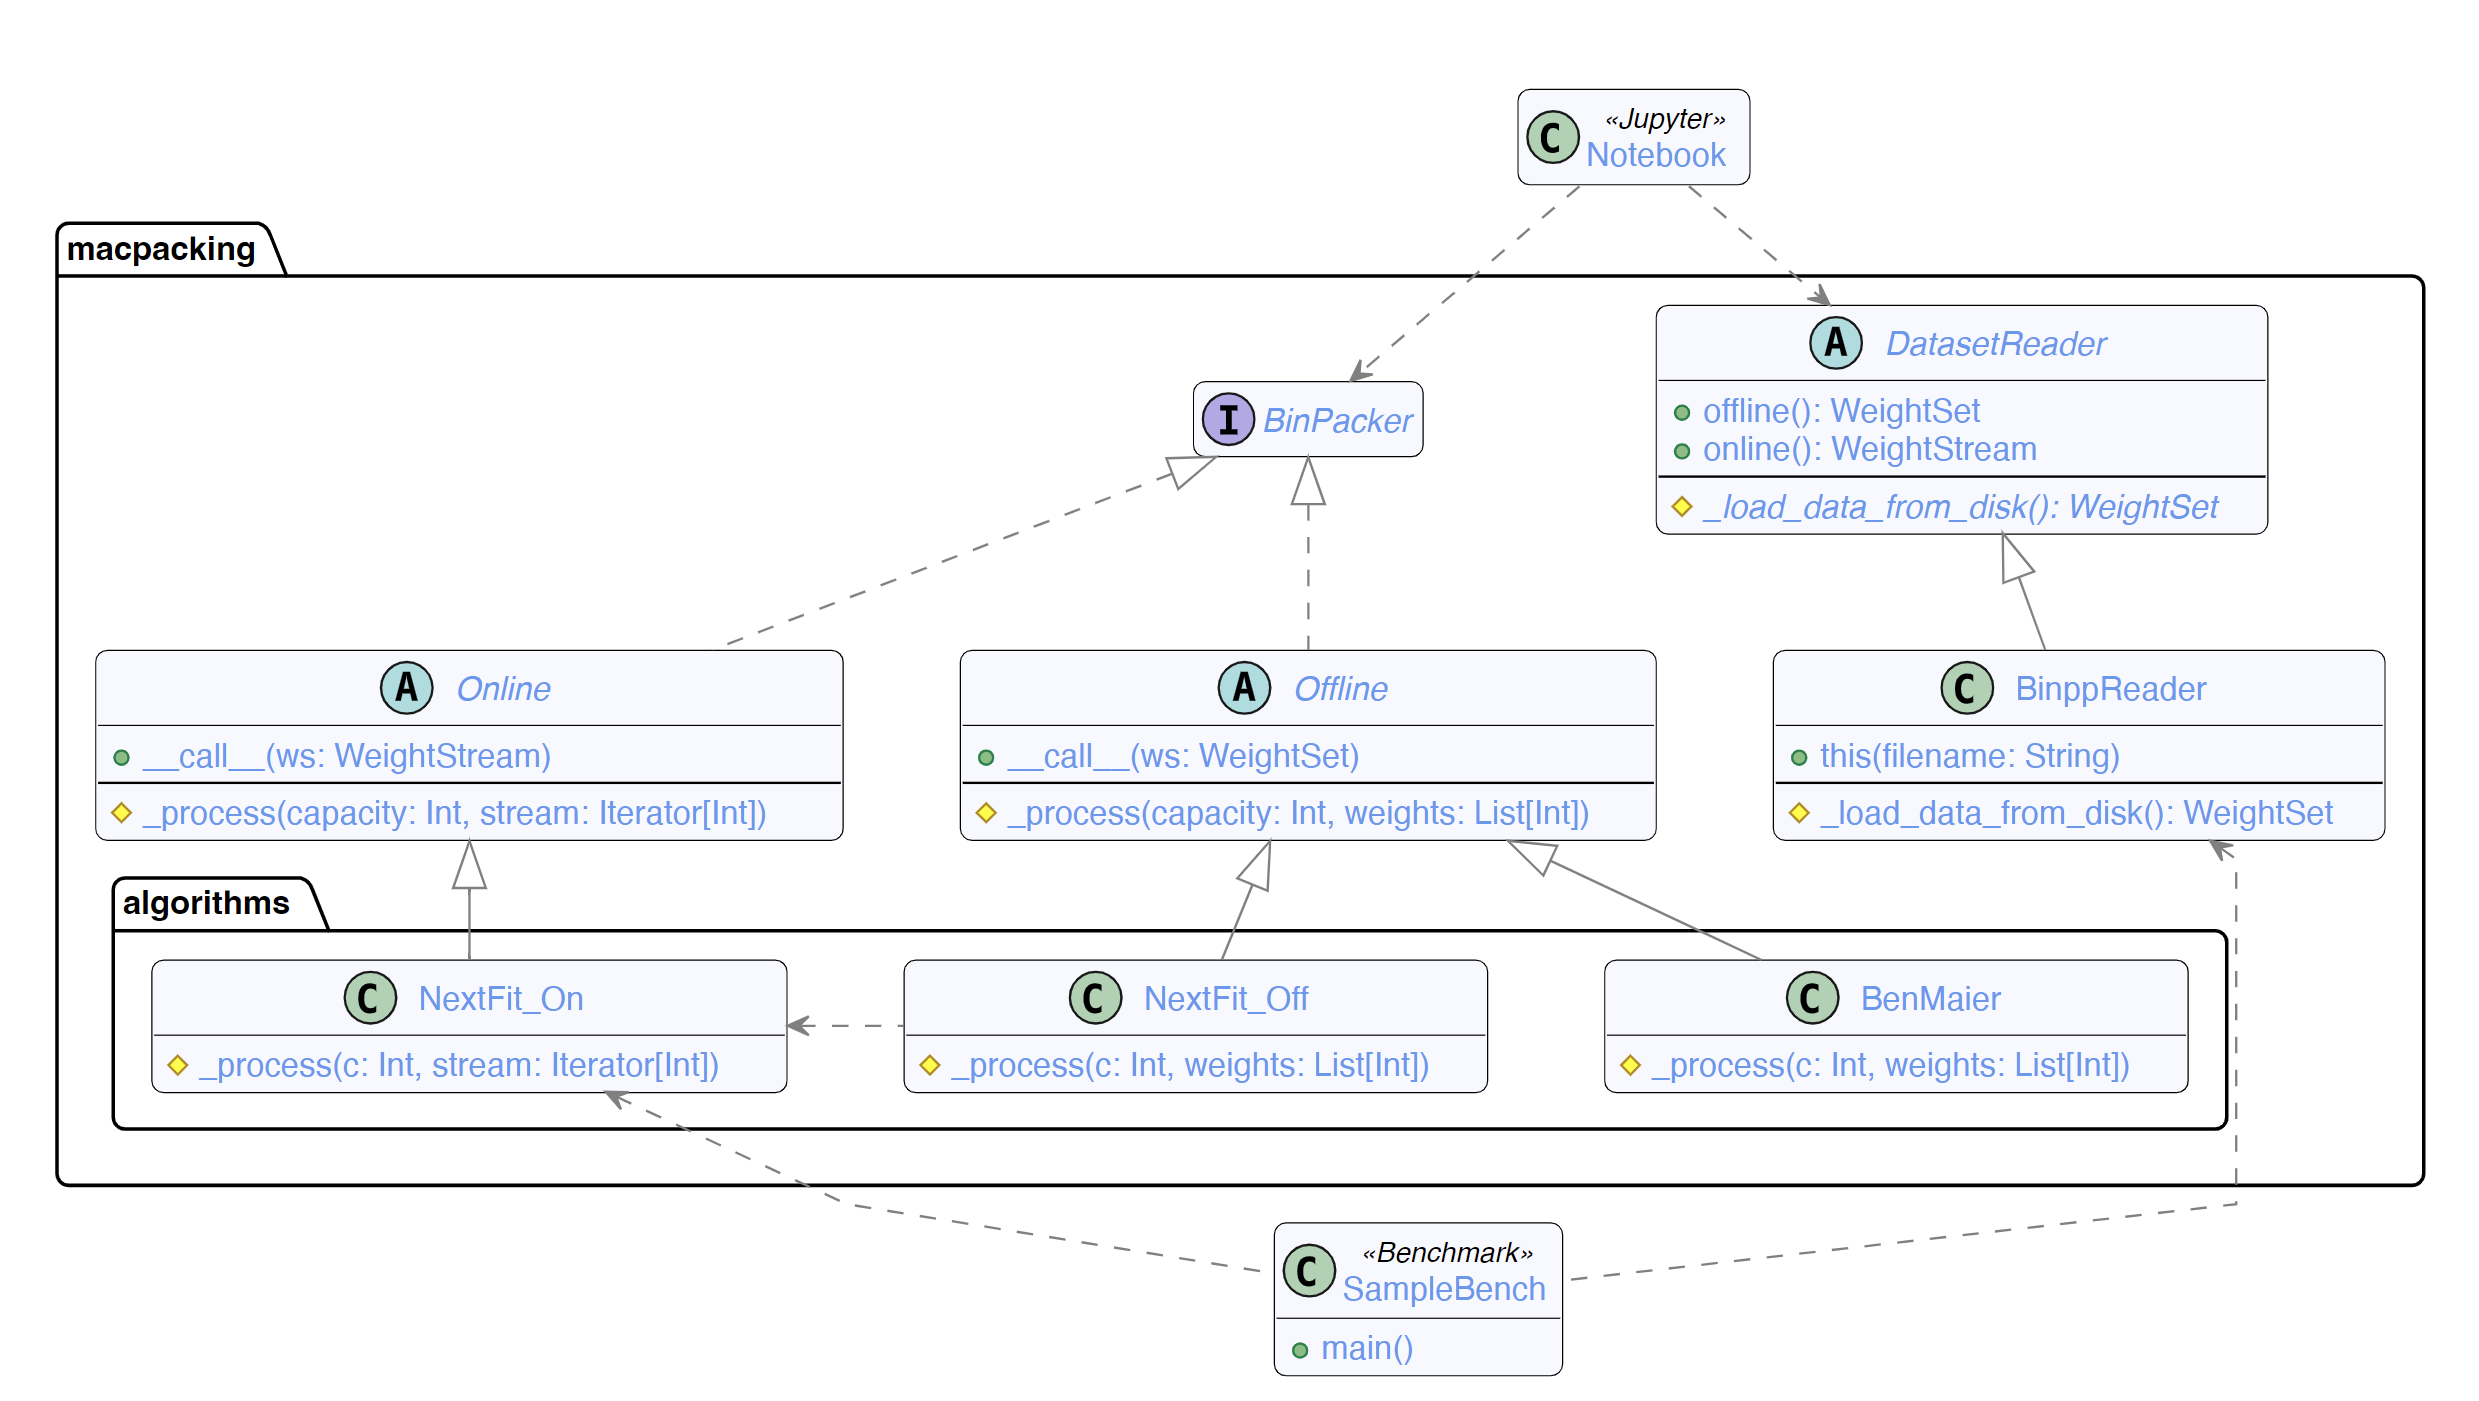

##### Single Responsibility

The single responsibility principle states that classes should have one and only one responsibility/functionality. The provided code follows this principle quite effectively. Take the abstract DatasetReader class and associated subclasses as examples. The DatasetReader class and subclasses have one main functionlity: process cases and return a weightStream or weightSet (as well as capacity) to support either an online or offline algorithm respectively. In a similar fashion, Online and Offline abstract classes and associated subclasses have the functionality of processing a weightStream or weightSet and return a Solution: list[list[int]].

##### Open-Closed Principle

The open-closed principle refers to objects being 'open for extension' but 'closed for modification'. The provided code does this with the use of abstract classes, interfaces, and effective association relationships. Once again let's look at a concrete example from the above UML. Take the DatasetReader abstract class as an example. The DatasetReader class is open for extension and closed for modification because new 'concrete' DatasetReaders can be added without modifying the original structure of the code. In this instance, the notion of reading data is entirely encapsulated. If the format of a case file changes, a new DatasetReader can be instantiated to support this new file format, and the DatasetReader can still accomplish its objective of producing input types that support the functionalities of the Offline and Online classes. The same goes for the Online and Offline classes, where the notion of 'binpacking' is encapsulated. New 'binpackers' can be created without changing the definition of what a Binpacker is, and still produce a Solution in the end.

##### Interface Segregation

The interface segragation principle states that classes don't/shouldn't depend on methods that they don't use. We see this to be true for the provided code through the use of abstract methods in the Offline, Online, and DatasetReader abstract classes. Concrete classes associated with these abstract classes only depend and implement the abstract methods of their superclass. For example, the BinppReader does not depend on the offline() and online() methods of the DatasetReader.

##### Dependancy Inversion

Dependancy inversion is a principle that states higher level classes should not depend on lower level classes. The higher level classes should depend on abstractions of the lower level ones. We see this visually in the UML, where all association and dependancy arrows only face upwards towards higher level classes. No interface or high level abstract class depends on its lower level subclasses. The abstract methods within each abstract class allow for high level entities to be completely independent of lower level ones. The high level classes are not concerned with the details of their abstract methods, meaning low level classes can implement them however they wish and still preserve the functionalities of the higher level class. We see this in the Offline and Online classes, where concrete online/offline algorithms can process cases differently, but the high level entity is not concerned with how they do this as long as a Solution is returned.


#### Dataset Explanation

Each dataset has a simimlar structure. The binpp datasets are formatted as follows: The first line contains the number of items that need to be 'packed' into bins. The second line provides the capacity (the maximum sum of weights) for each bin. The remaining lines provide the weights of each object. The jburkardt dataset is similar, however it does not provide the number of items and list the capacity and object weights in seperate files. 

The dimensions used for the dataset are represented with the naming convention NxCyWz_v.B. Where x represents the number of items, x = (1,2,3,4) -> n = (50, 100, 200, 500), y represents the capacity for a bin where y = (1,2,3) -> (100,120,150) and z represents the possible weight ranges z = (1,2,3) -> (1-100, 20-100, 30-100). These dimensions allow us to evaluate different bin packing algorithms with respect to changes in capacity, number of items, and weight possibilities. It helps us answer questions like: How will these algorithms perform with a larger number of objects? How will these algorithms behave larger/smaller weights for each object? How does varying capacity possibly change the number of bins used? Being able to answer these questions about each individual algorithm can help us compare the performances of different offline and online algorithms with respect to predefined KPIs.

## T2: Implement and Benchmark Algorithms

#### Benchmarking Protocol and Results

##### Retrieving the Benchmark Results

In [25]:
import json
from pyperf import BenchmarkSuite
from benchmark import Benchmark
from string import ascii_uppercase
import numpy as np
import matplotlib.pyplot as plt

#.load
#suite.get_benchmark
#.get_vallues
benchfile = 'benchResults.json'
bench = Benchmark()
algorithms = bench.algos
dataset = bench.CASES
foldername = dataset.split('/')[-1] + '_'
num_cases = len(bench.list_case_files(dataset))

def generate_benchnames(foldername: str, algo_name: str, num_cases: int):
    names: list[str] = []
    for i in range(num_cases):
        names.append(foldername + ascii_uppercase[i] + '.BPP.txt-' + algo_name)
    return names

def get_avg_runtime(filename: str, bench_name: str):
    suite = BenchmarkSuite.load(filename)
    bench = suite.get_benchmark(bench_name)
    bench_result = list(bench.get_values())
    #calculates average of all runs
    s = sum(bench_result)
    l = len(bench_result)
    return s/l

def get_bench_results():
    results = {}
    for a in algorithms:
        benchnames = generate_benchnames(foldername, a, num_cases)
        for name in benchnames:
            results[name] = get_avg_runtime(benchfile, name) 
    return results
        
results = get_bench_results()
#print(json.dumps(results, indent=4, sort_keys=False))

##### Storing Online Results

In [14]:
nf_online = [results[name] for name in results if name.endswith('nf-online')]
bf_online = [results[name] for name in results if name.endswith('bf-online')]
wf_online = [results[name] for name in results if name.endswith('wf-online')]
ff_online = [results[name] for name in results if name.endswith('ff-online')]

##### Storing Online Results

In [6]:
nf_offline = [results[name] for name in results if name.endswith('nf-online')]
bf_offline = [results[name] for name in results if name.endswith('bf-online')]
wf_offline = [results[name] for name in results if name.endswith('wf-online')]
ff_offline = [results[name] for name in results if name.endswith('ff-online')]

##### Storing Results for Baseline and Terrible 

In [7]:
terrible = [results[name] for name in results if name.endswith('terrible')]
baseline = [results[name] for name in results if name.endswith('baseline')]

##### Plotting Execution Times

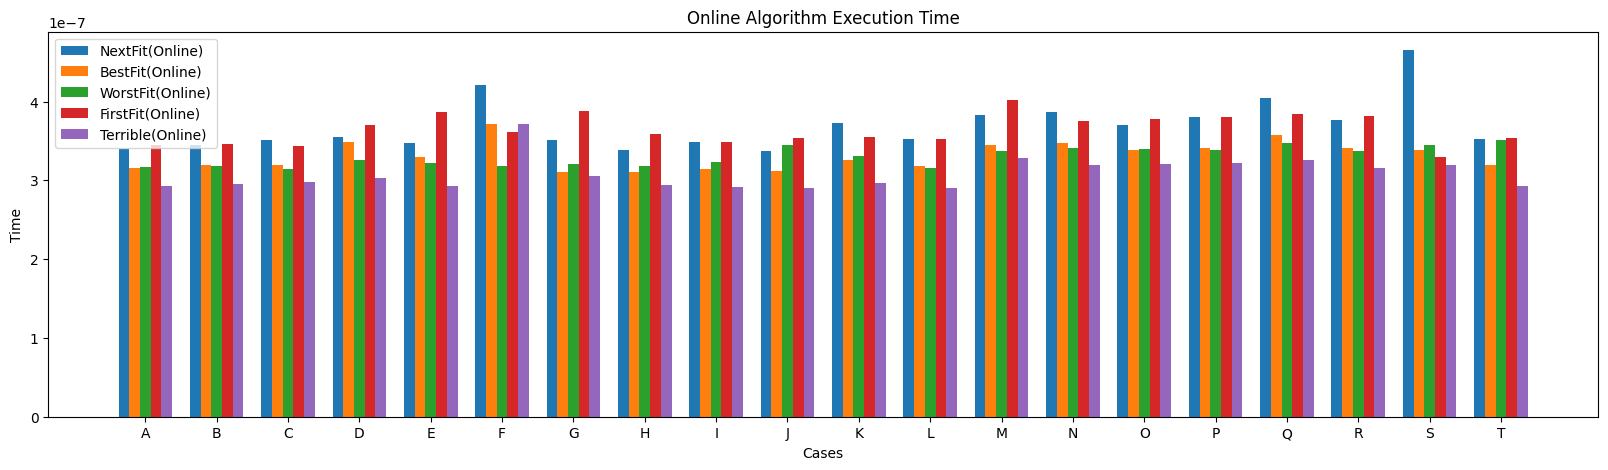

In [51]:
x = [i for i in range(num_cases)]
x = np.arange(len(x))

#runtimes for online algorithms
plt.rcParams["figure.figsize"] = [20, 5]
plt.bar(x - 0.3, nf_online, 0.15, label = 'NextFit(Online)')
plt.bar(x - 0.15, bf_online, 0.15, label = 'BestFit(Online)')
plt.bar(x, wf_online, 0.15, label = 'WorstFit(Online)')
plt.bar(x + 0.15, ff_online, 0.15, label = 'FirstFit(Online)')
plt.bar(x + 0.3, terrible, 0.15, label = 'Terrible(Online)')

plt.xticks(x, (ascii_uppercase[i] for i in range(num_cases)))
plt.title("Online Algorithm Execution Time")
plt.xlabel('Cases')
plt.ylabel('Time')
plt.legend()
plt.show()

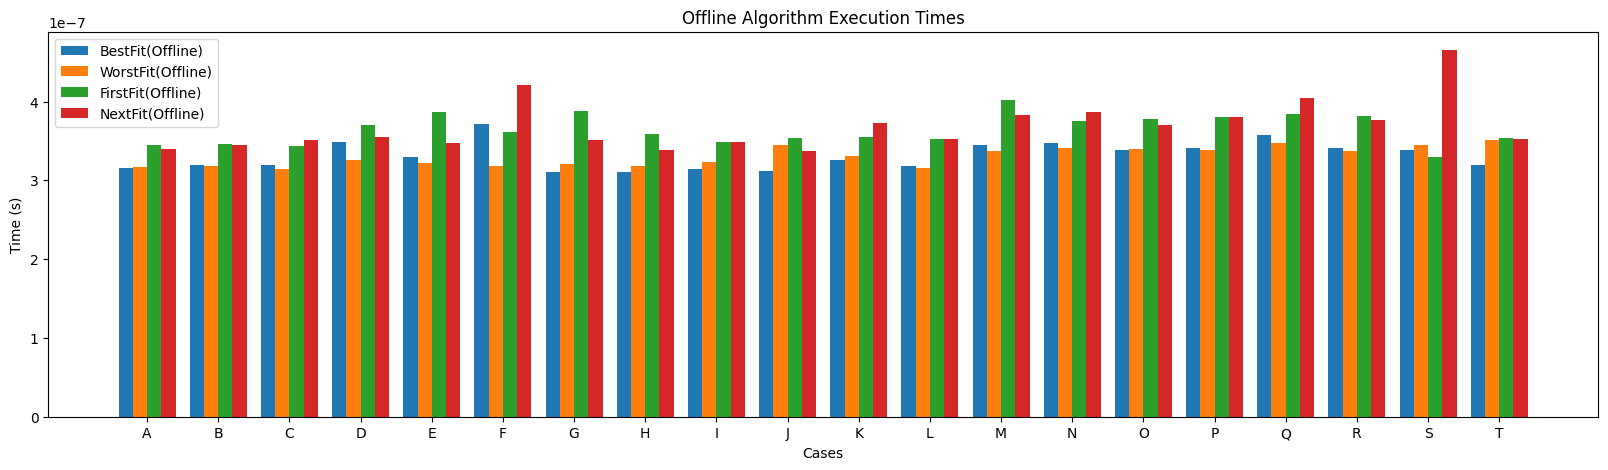

In [31]:
#runtimes for offline algorithms
plt.rcParams["figure.figsize"] = [20, 5]
plt.bar(x - 0.3, bf_offline, 0.2, label = 'BestFit(Offline)')
plt.bar(x - 0.1, wf_offline, 0.2, label = 'WorstFit(Offline)')
plt.bar(x + 0.1, ff_offline, 0.2, label = 'FirstFit(Offline)')
plt.bar(x + 0.3, nf_offline, 0.2, label = 'NextFit(Offline)')


plt.xticks(x, (ascii_uppercase[i] for i in range(num_cases)))
plt.title("Offline Algorithm Execution Times")
plt.xlabel('Cases')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

#### Measuring KPIs

##### Average Number of Bins

In [83]:
from macpacking.algorithms.online import NextFit as Nf_online, BestFit, WorstFit, TerriblePacker, FirstFit
from macpacking.algorithms.offline import NextFit as Nf_offline, FirstFitDecreasing, BestFitDecreasing, WorstFitDecreasing 
from macpacking.algorithms.baseline import BenMaier
from macpacking.reader import BinppReader
from os import listdir
from os.path import isfile, join, basename

dataset = '_datasets/binpp/N1C1W1'
cases = sorted([f'{dataset}/{f}' for f in listdir(dataset) if isfile(join(dataset, f))])

algorithms = {
       'terrible': TerriblePacker(),
       'nf-online': Nf_online(),
       'bf-online': BestFit(),
       'wf-online': WorstFit(),
       'ff-online': FirstFit(),
       'nf-offline': Nf_offline(),
       'bf-offline': BestFitDecreasing(),
       'wf-offline': WorstFitDecreasing(),
       'ff-offline': FirstFitDecreasing(),
       'baseline': BenMaier()
   }

avg_num_bins = {}

for a in algorithms:
    num_bins = []
    
    for case in cases:
        
        online_input = BinppReader(case).online()
        offline_input = BinppReader(case).offline()
        
        if a == 'terrible' or a.endswith('online'):
            result = algorithms[a](online_input)
            num_bins.append(len(result))
        
        else:
            result = algorithms[a](offline_input)
            num_bins.append(len(result))
    
    avg_num_bins[a] = sum(num_bins)//len(num_bins)   

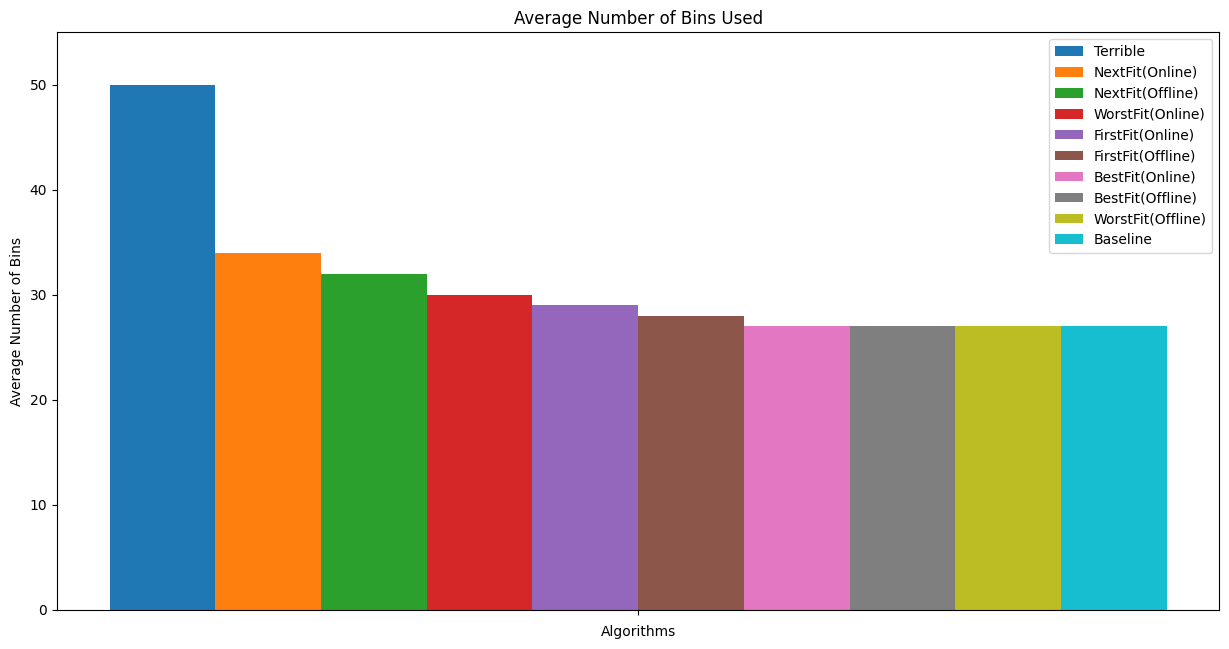

In [84]:
x = np.arange(1)
y = avg_num_bins
plt.rcParams["figure.figsize"] = [15, 7.5]
plt.bar(x - 0.9, y['terrible'], 0.2, label = 'Terrible')
plt.bar(x - 0.7, y['nf-online'], 0.2, label = 'NextFit(Online)')
plt.bar(x - 0.5, y['nf-offline'], 0.2, label = 'NextFit(Offline)')
plt.bar(x - 0.3, y['wf-online'], 0.2, label = 'WorstFit(Online)')
plt.bar(x - 0.1, y['ff-online'], 0.2, label = 'FirstFit(Online)')
plt.bar(x + 0.1, y['ff-offline'], 0.2, label = 'FirstFit(Offline)')
plt.bar(x + 0.3, y['bf-online'], 0.2, label = 'BestFit(Online)')
plt.bar(x + 0.5, y['bf-offline'], 0.2, label = 'BestFit(Offline)')
plt.bar(x + 0.7, y['wf-offline'], 0.2, label = 'WorstFit(Offline)')
plt.bar(x + 0.9, y['baseline'], 0.2, label = 'Baseline')

plt.xticks(x, '')
plt.title("Average Number of Bins Used")
plt.xlabel('Algorithms')
plt.ylabel('Average Number of Bins')
plt.ylim(0, 55)
plt.legend()
plt.show()

##### Average Space Remaining

In [82]:
dataset = '_datasets/binpp/N1C1W1'
cases = sorted([f'{dataset}/{f}' for f in listdir(dataset) if isfile(join(dataset, f))])

algorithms = {
       'terrible': TerriblePacker(),
       'nf-online': Nf_online(),
       'bf-online': BestFit(),
       'wf-online': WorstFit(),
       'ff-online': FirstFit(),
       'nf-offline': Nf_offline(),
       'bf-offline': BestFitDecreasing(),
       'wf-offline': WorstFitDecreasing(),
       'ff-offline': FirstFitDecreasing(),
       'baseline': BenMaier()
   }

avg_space_remaining_in_bins = {}

def get_avg_space(binpacker_result: list[list[int]], capacity:int):
    s = 0
    for b in binpacker_result:
        s += capacity - sum(b)
    return s/len(binpacker_result)

for a in algorithms:
    
    avg_space = []
    
    for case in cases:
        
        online_input = BinppReader(case).online()
        offline_input = BinppReader(case).offline()
        capacity = offline_input[0]
        
        if a == 'terrible' or a.endswith('online'):
            result = algorithms[a](online_input)
            avg_space.append(get_avg_space(result, capacity))
        
        else:
            result = algorithms[a](offline_input)
            avg_space.append(get_avg_space(result, capacity))
    
    avg_space_remaining_in_bins[a] = sum(avg_space)//len(avg_space)

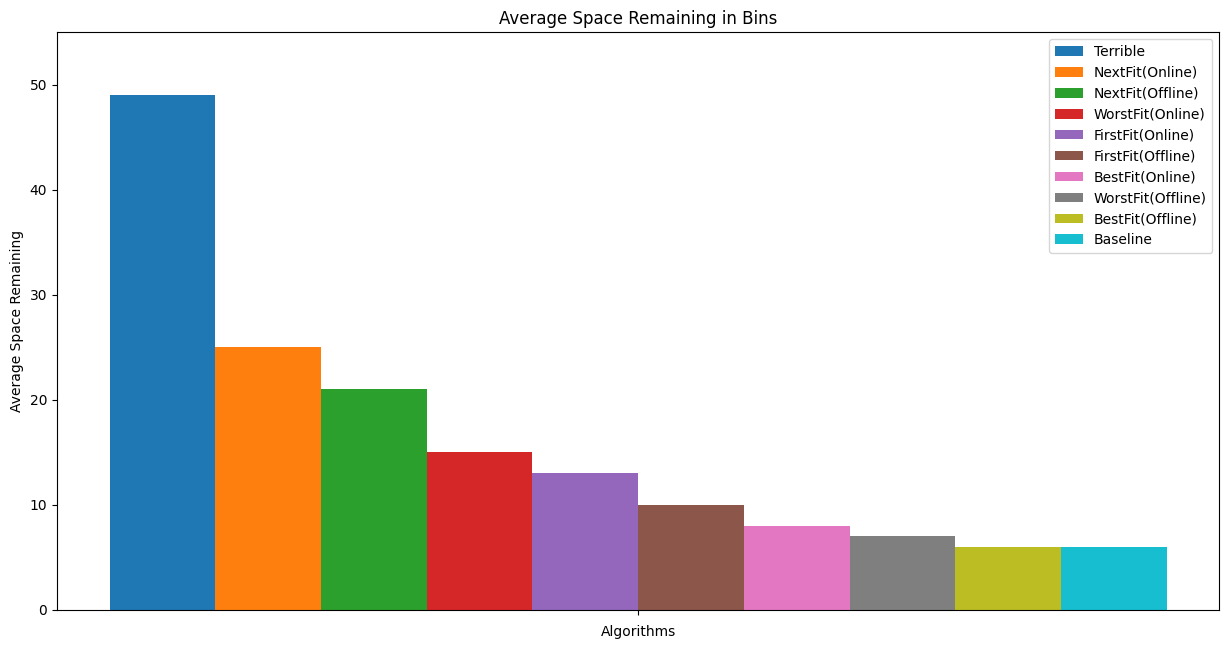

In [89]:
x = np.arange(1)
y = avg_space_remaining_in_bins
plt.rcParams["figure.figsize"] = [15, 7.5]
plt.bar(x - 0.9, y['terrible'], 0.2, label = 'Terrible')
plt.bar(x - 0.7, y['nf-online'], 0.2, label = 'NextFit(Online)')
plt.bar(x - 0.5, y['nf-offline'], 0.2, label = 'NextFit(Offline)')
plt.bar(x - 0.3, y['wf-online'], 0.2, label = 'WorstFit(Online)')
plt.bar(x - 0.1, y['ff-online'], 0.2, label = 'FirstFit(Online)')
plt.bar(x + 0.1, y['ff-offline'], 0.2, label = 'FirstFit(Offline)')
plt.bar(x + 0.3, y['bf-online'], 0.2, label = 'BestFit(Online)')
plt.bar(x + 0.5, y['wf-offline'], 0.2, label = 'WorstFit(Offline)')
plt.bar(x + 0.7, y['bf-offline'], 0.2, label = 'BestFit(Offline)')
plt.bar(x + 0.9, y['baseline'], 0.2, label = 'Baseline')

plt.xticks(x, '')
plt.title("Average Space Remaining in Bins")
plt.xlabel('Algorithms')
plt.ylabel('Average Space Remaining')
plt.ylim(0, 55)
plt.legend()
plt.show()

#### Algorithm Analysis

## T3: Measure Improvement Margin

## T4: Add Smarter Algorithms

## T5: From Fixed Capacity to Fixed Bins

## Self-reflection questions

As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

  - What process did you go through to produce this result? (Backward)
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)